In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from imblearn.over_sampling import SMOTE

In [6]:
ruta = ".\datos_mesagges.csv"
df = pd.read_csv(ruta, encoding = 'utf-8')
df.head()

,message_id,channel_id,user_id,text,created_at,user_name,channel_name,longitud_texto,hora_envio,dia_semana,sentimiento,es_pregunta,tiempo_hasta_respuesta,es_cuello_botella,falta_claridad
0,M0005,C001,U020,¡Feliz viernes equipo! 🎉,2025-06-18 08:17:49+00:00,Angelino Chacón (Data),general,24,8,2,0.0,False,1418.166667,0,0
1,M0017,C001,U009,¿Alguien sabe cuándo es la próxima demo? 🔥,2025-06-19 07:55:59+00:00,Teobaldo Carrasco (Frontend),general,42,7,3,0.0,True,385.116667,1,0
2,M0011,C001,U010,Recordatorio: reunión de retrospectiva mañana ✅,2025-06-19 14:21:06+00:00,América Manuel (UX/UI),general,47,14,3,0.0,False,600.800000,0,0
3,M0013,C001,U005,¡Hola equipo! ¿Cómo van con sus tareas? 💯,2025-06-20 00:21:54+00:00,Ofelia Torrents (DevOps),general,41,0,4,0.0,True,1336.633333,1,0
4,M0018,C001,U013,Recordatorio: reunión de retrospectiva mañana,2025-06-20 22:38:32+00:00,Anastasia Batlle (Frontend),general,45,22,4,0.0,False,475.316667,0,0


Creación del modelo: Optimizar tiempos de respuesta

In [7]:
df['mean_tiempo_usuario'] = df.groupby('user_id')['tiempo_hasta_respuesta'].transform('mean')

In [8]:
X = df[['hora_envio', 'dia_semana', 'es_pregunta', 'mean_tiempo_usuario']]
y = df['tiempo_hasta_respuesta'].fillna(0)  

smote = SMOTE(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
print('La forma de X_train es: ', X_train.shape)
print('La forma de y_train es: ', y_train.shape)
print('La forma de X_test es: ', X_test.shape)
print('La forma de y_test es: ', y_test.shape)

La forma de X_train es:  (168, 4)
La forma de y_train es:  (168,)
La forma de X_test es:  (73, 4)
La forma de y_test es:  (73,)


In [12]:
from sklearn.ensemble import RandomForestRegressor
modelo_tiempos = RandomForestRegressor().fit(X, y)

In [19]:
y_pred = modelo_tiempos.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} minutos | RMSE: {rmse:.2f} minutos | R²: {r2:.2f}")

MAE: 260.63 minutos | RMSE: 337.95 minutos | R²: 0.83


c:\Users\Equipo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score

#Esta sobreajustando
scores = cross_val_score(modelo_tiempos, X, y, cv=5, scoring='neg_mean_squared_error')
print("RMSE promedio en validación cruzada:", np.sqrt(-scores.mean()))

RMSE promedio en validación cruzada: 903.2582768000908


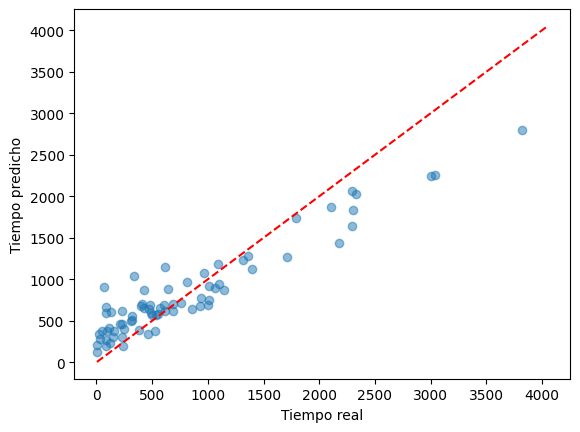

In [ ]:

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Tiempo real")
plt.ylabel("Tiempo predicho")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  
plt.show()